# CLIP classification

Lecture 11 | CMU ANLP Spring 2026 | Instructor: Sean Welleck

Zero-shot classification using OpenAI's CLIP model.

## Setup

In [5]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch

from transformers import CLIPProcessor, CLIPModel

# Load model
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")
print("CLIP model loaded successfully!")

Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 29537.35it/s]


CLIP model loaded successfully!


## Load and Display Image

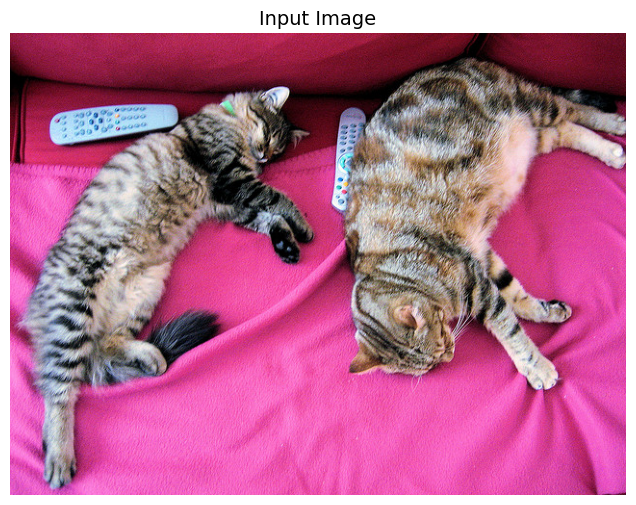

Image loaded from: http://images.cocodataset.org/val2017/000000039769.jpg


In [6]:
# Load image from COCO dataset
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Display
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.title("Input Image", fontsize=14)
plt.show()

print(f"Image loaded from: {url}")

## Simple Classification: Cat vs Dog

In [7]:
# Define text descriptions
texts = ["a photo of a cat", "a photo of a dog"]

# Process inputs
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

# Get model outputs
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # image-text similarity scores
probs = logits_per_image.softmax(dim=1)  # convert to probabilities

# Display results
print("=" * 50)
print("Cat vs Dog Classification")
print("=" * 50)

print("\nRaw similarity scores (logits):")
for i, text in enumerate(texts):
    print(f"  {text}: {logits_per_image[0][i].item():.3f}")

print("\nProbabilities:")
for i, text in enumerate(texts):
    print(f"  {text}: {probs[0][i].item():.1%}")

# Most likely
max_idx = probs[0].argmax().item()
print(f"\nPrediction: {texts[max_idx]} ({probs[0][max_idx].item():.1%})")

Cat vs Dog Classification

Raw similarity scores (logits):
  a photo of a cat: 18.904
  a photo of a dog: 11.716

Probabilities:
  a photo of a cat: 99.9%
  a photo of a dog: 0.1%

Prediction: a photo of a cat (99.9%)


## Zero-shot Classification with More Labels

In [8]:
# More diverse text descriptions
candidate_labels = [
    "a photo of a cat",
    "a photo of a kitten", 
    "a photo of a dog",
    "a photo of a person",
    "a photo of furniture",
    "two cats sitting together",
    "cats on a couch",
    "animals indoors",
    "a living room scene",
    "pets at home"
]

# Process with CLIP
inputs = processor(text=candidate_labels, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Calculate probabilities
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

# Sort by probability
probs_list = probs[0].tolist()
sorted_indices = sorted(range(len(probs_list)), key=lambda i: probs_list[i], reverse=True)

print("=" * 60)
print("Zero-shot Classification Results")
print("=" * 60)

print("\nTop 5 predictions:\n")
for rank, idx in enumerate(sorted_indices[:5], 1):
    print(f"{rank}. {candidate_labels[idx]}: {probs_list[idx]:.2%}")
    
print("\n" + "-" * 40)
print("\nAll predictions:\n")
for idx in sorted_indices:
    confidence = probs_list[idx]
    bar = "█" * int(confidence * 30)
    print(f"{candidate_labels[idx]:30s} {bar} {confidence:.2%}")

Zero-shot Classification Results

Top 5 predictions:

1. cats on a couch: 89.08%
2. two cats sitting together: 5.39%
3. animals indoors: 1.97%
4. a living room scene: 1.62%
5. pets at home: 1.16%

----------------------------------------

All predictions:

cats on a couch                ██████████████████████████ 89.08%
two cats sitting together      █ 5.39%
animals indoors                 1.97%
a living room scene             1.62%
pets at home                    1.16%
a photo of furniture            0.35%
a photo of a cat                0.33%
a photo of a kitten             0.10%
a photo of a person             0.00%
a photo of a dog                0.00%
